In [1]:
from autoencode import Autoencoder
from comet_ml import Experiment

import keras.layers as kl
import keras.models as km
import keras.regularizers as kr

from keras import backend as K

import pandas as pd
from sklearn.pipeline import make_pipeline, Pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import load_model

import seaborn as sns

import numpy as np

Using TensorFlow backend.


In [2]:
data1 = pd.read_csv("X1_train.csv", index_col=0)
data2 = pd.read_csv("X2_train.csv", index_col=0)
data3 = pd.read_csv("X3_train.csv", index_col=0)

data = pd.concat([data1, data2, data3], axis=1)

input_shape = (data.shape[1],)
latent_shape = (100,)

config = {
    "encoder": [
        {
            "name": "hidden1_encoder",
            "type": "Dense",
            "kwargs": {
                "units": 200,
                "activation": "relu"
            },
            "regularizer": {
                "type": "l1",
                "value": 1e-3
            }
        },
        {
            "name": "latent",
            "type": "Dense",
            "kwargs": {
                "units": latent_shape[0],
                "activation": "relu"
            }
        }
    ],
    "decoder": [
        {
            "name": "hidden1_decoder",
            "type": "Dense",
            "kwargs": {
                "units": 200,
                "activation": "relu"
            }
        },
        {
            "name": "output",
            "type": "Dense",
            "kwargs": {
                "units": data.shape[1],
                "activation": "linear"
            }
        }
    ]
}

ae = Autoencoder(config["encoder"],
                 config["decoder"],
                 input_shape=input_shape,
                 latent_shape=latent_shape,
                 loss="mean_squared_error",
                 optimizer_params=None)


In [3]:
data_train, data_val = train_test_split(data, test_size=0.33, random_state=42)

In [4]:
scaler = StandardScaler()
scaler.fit(data_train)

data_train_scaled = scaler.transform(data_train)
data_val_scaled = scaler.transform(data_val)

In [5]:
experiment = Experiment(project_name="comet test", api_key="50kNmWUHJrWHz3FlgtpITIsB1")

COMET WARNING: We detected that you are running inside a Ipython/Jupyter notebook environment but we cannot save your notebook source code. Please be sure to have installed comet_ml as a notebook server extension by running:
jupyter comet_ml enable
COMET WARNING: Comet.ml support for Ipython Notebook is limited at the moment, automatic monitoring and stdout capturing is deactivated
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/marieroald/comet-test/9d9ba1a6b2bd463abf324ee59d4443be



In [6]:
ae.fit(data_train_scaled)

Epoch 1/500
134/134 [==============================] - 0s 2ms/step - loss: 8.1276
Epoch 2/500
134/134 [==============================] - 0s 464us/step - loss: 5.7997
Epoch 3/500
134/134 [==============================] - 0s 469us/step - loss: 4.5897
Epoch 4/500
134/134 [==============================] - 0s 459us/step - loss: 3.6618
Epoch 5/500
134/134 [==============================] - 0s 455us/step - loss: 3.0301
Epoch 6/500
134/134 [==============================] - 0s 477us/step - loss: 2.5644
Epoch 7/500
134/134 [==============================] - 0s 470us/step - loss: 2.2965
Epoch 8/500
134/134 [==============================] - 0s 463us/step - loss: 2.1167
Epoch 9/500
134/134 [==============================] - 0s 443us/step - loss: 1.9659
Epoch 10/500
134/134 [==============================] - 0s 458us/step - loss: 1.8772
Epoch 11/500
134/134 [==============================] - 0s 479us/step - loss: 1.8536
Epoch 12/500
134/134 [==============================] - 0s 463us/step - loss

134/134 [==============================] - 0s 485us/step - loss: 1.0189
Epoch 193/500
134/134 [==============================] - 0s 439us/step - loss: 1.0197
Epoch 194/500
134/134 [==============================] - 0s 441us/step - loss: 1.0118
Epoch 195/500
134/134 [==============================] - 0s 448us/step - loss: 1.0165
Epoch 196/500
134/134 [==============================] - 0s 439us/step - loss: 1.0385
Epoch 197/500
134/134 [==============================] - 0s 435us/step - loss: 1.0264
Epoch 198/500
134/134 [==============================] - 0s 447us/step - loss: 1.0135
Epoch 199/500
134/134 [==============================] - 0s 449us/step - loss: 1.0006
Epoch 200/500
134/134 [==============================] - 0s 431us/step - loss: 0.9978
Epoch 201/500
134/134 [==============================] - 0s 477us/step - loss: 0.9864
Epoch 202/500
134/134 [==============================] - 0s 461us/step - loss: 0.9979
Epoch 203/500
134/134 [==============================] - 0s 441us/st

134/134 [==============================] - 0s 430us/step - loss: 0.8629
Epoch 383/500
134/134 [==============================] - 0s 469us/step - loss: 0.8364
Epoch 384/500
134/134 [==============================] - 0s 450us/step - loss: 0.8107
Epoch 385/500
134/134 [==============================] - 0s 447us/step - loss: 0.8023
Epoch 386/500
134/134 [==============================] - 0s 453us/step - loss: 0.7841
Epoch 387/500
134/134 [==============================] - 0s 451us/step - loss: 0.7745
Epoch 388/500
134/134 [==============================] - 0s 474us/step - loss: 0.7648
Epoch 389/500
134/134 [==============================] - 0s 445us/step - loss: 0.7550
Epoch 390/500
134/134 [==============================] - 0s 440us/step - loss: 0.7690
Epoch 391/500
134/134 [==============================] - 0s 457us/step - loss: 0.7747
Epoch 392/500
134/134 [==============================] - 0s 438us/step - loss: 0.7606
Epoch 393/500
134/134 [==============================] - 0s 423us/st

In [7]:
decoded = ae.predict(data_val_scaled)

In [8]:
residual = np.abs(data_val_scaled - decoded)
residual = np.sqrt((data_val_scaled - decoded) ** 2)
display(residual)

array([[0.06068603, 0.1941108 , 0.57726573, ..., 0.94081948, 1.0788266 ,
        1.17750272],
       [1.23656099, 0.52023502, 0.38674876, ..., 0.93476582, 0.54178957,
        0.21558304],
       [0.18707376, 0.37760612, 1.02939797, ..., 1.73319451, 0.86288769,
        0.82821197],
       ...,
       [0.08283245, 0.16074928, 1.07003563, ..., 0.03600723, 0.73191333,
        1.02606109],
       [0.11318206, 0.13938245, 0.18510735, ..., 1.6938654 , 0.42034869,
        0.24007638],
       [0.83183232, 0.93868836, 0.60453638, ..., 2.32105398, 3.36430123,
        2.13308659]])

In [17]:
display(residual.mean(0))

array([0.58580551, 0.7394135 , 0.77382304, ..., 0.808293  , 0.86182167,
       1.2083509 ])

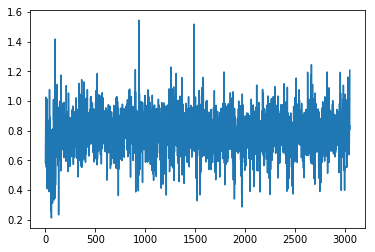

In [18]:
plt.plot(residual.mean(0))
plt.show()

In [19]:
ae.decoder_layers

In [20]:
def plot_loss(mean_loss, std_loss, steps):
        colors = sns.color_palette()
        fig = plt.figure(figsize=(20,5))
        ax = fig.add_subplot(111) 
        ax.fill_between(steps, mean_loss + std_loss, np.maximum(mean_loss - std_loss, 0), facecolor=colors[1], alpha=0.2, color = colors[1], label='std')
        ax.plot(steps, mean_loss, color = colors[1], linestyle="-")
        return fig

/home/marie/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


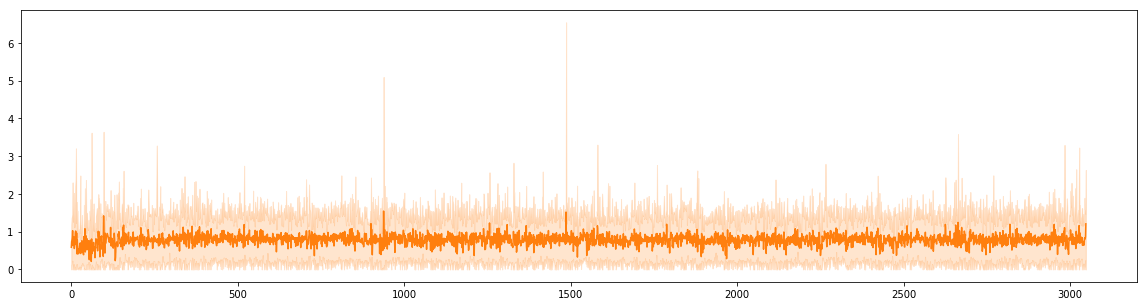

In [21]:
fig = plot_loss(residual.mean(0), residual.std(0), np.arange(len(residual.mean(0))))
fig.show()

In [14]:
n1 = data1.shape[1]
n2 = data2.shape[1]
n3 = data3.shape[1]
print(n1, n2, n3)

144 1456 1448


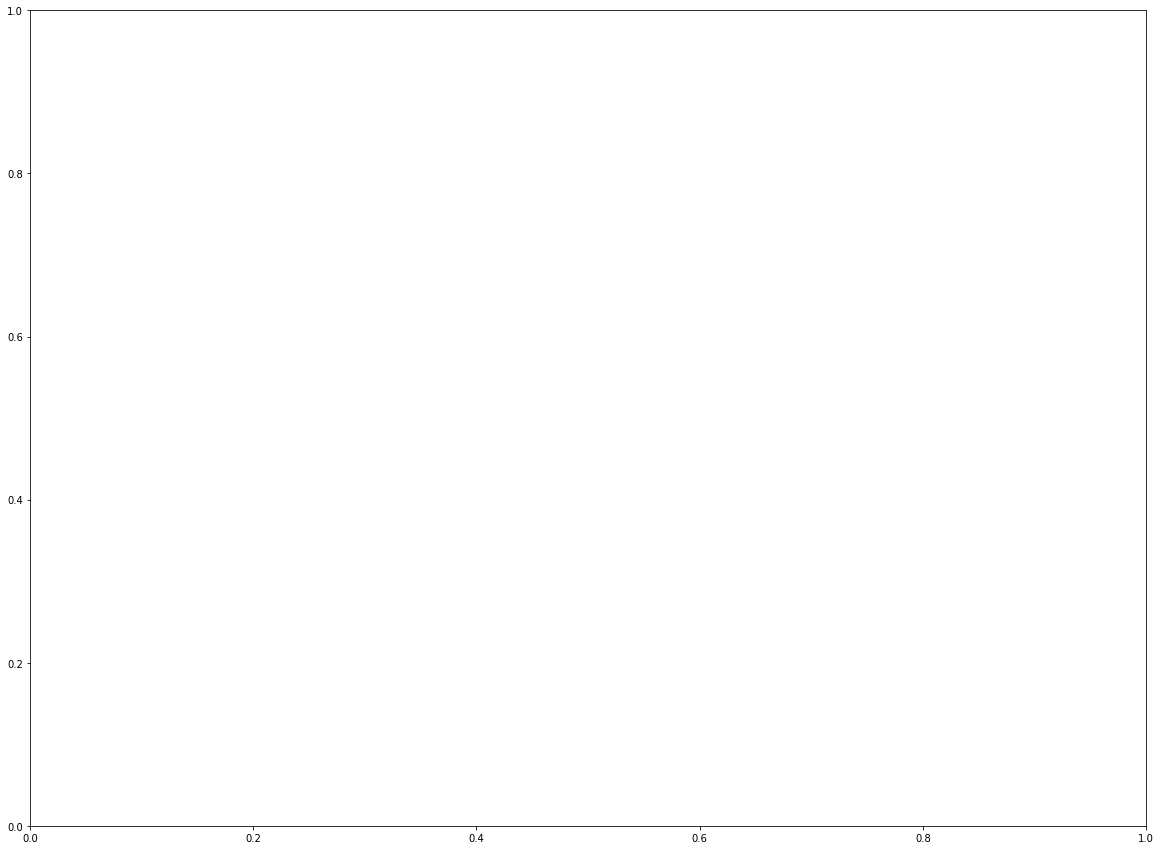

In [15]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)


SyntaxError: unexpected EOF while parsing (<ipython-input-16-5b57d1588261>, line 2)

COMET WARNING: We detected that you are running inside a Ipython/Jupyter notebook environment but we cannot save your notebook source code. Please be sure to have installed comet_ml as a notebook server extension by running:
jupyter comet_ml enable
COMET WARNING: Comet.ml support for Ipython Notebook is limited at the moment, automatic monitoring and stdout capturing is deactivated
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/marieroald/comet-test/80a3b77464dd431c8123189b791d6197



Train on 180 samples, validate on 20 samples
Epoch 1/500
180/180 [==============================] - 0s 2ms/step - loss: 8.2341 - val_loss: 5.2826
Epoch 2/500
180/180 [==============================] - 0s 482us/step - loss: 5.8932 - val_loss: 5.3547
Epoch 3/500
180/180 [==============================] - 0s 526us/step - loss: 4.6597 - val_loss: 5.2692
Epoch 4/500
180/180 [==============================] - 0s 465us/step - loss: 3.8204 - val_loss: 5.1901
Epoch 5/500
180/180 [==============================] - 0s 505us/step - loss: 3.1095 - val_loss: 5.2015
Epoch 6/500
180/180 [==============================] - 0s 561us/step - loss: 2.7018 - val_loss: 4.9837
Epoch 7/500
180/180 [==============================] - 0s 537us/step - loss: 2.3654 - val_loss: 5.1637
Epoch 8/500
180/180 [==============================] - 0s 571us/step - loss: 2.1372 - val_loss: 5.0508
Epoch 9/500
180/180 [==============================] - 0s 458us/step - loss: 2.0068 - val_loss: 5.0780
Epoch 10/500
180/180 [========

180/180 [==============================] - 0s 482us/step - loss: 0.9979 - val_loss: 4.0740
Epoch 158/500
180/180 [==============================] - 0s 441us/step - loss: 0.9958 - val_loss: 4.0178
Epoch 159/500
180/180 [==============================] - 0s 426us/step - loss: 0.9852 - val_loss: 4.0929
Epoch 160/500
180/180 [==============================] - 0s 442us/step - loss: 0.9758 - val_loss: 4.1516
Epoch 161/500
180/180 [==============================] - 0s 449us/step - loss: 0.9719 - val_loss: 4.2831
Epoch 162/500
180/180 [==============================] - 0s 433us/step - loss: 0.9804 - val_loss: 4.1615
Epoch 163/500
180/180 [==============================] - 0s 418us/step - loss: 0.9776 - val_loss: 4.1803
Epoch 164/500
180/180 [==============================] - 0s 418us/step - loss: 0.9729 - val_loss: 4.1668
Epoch 165/500
180/180 [==============================] - 0s 412us/step - loss: 0.9694 - val_loss: 4.1538
Epoch 166/500
180/180 [==============================] - 0s 423us/ste

180/180 [==============================] - 0s 453us/step - loss: 0.7393 - val_loss: 3.5410
Epoch 314/500
180/180 [==============================] - 0s 455us/step - loss: 0.7389 - val_loss: 3.5972
Epoch 315/500
180/180 [==============================] - 0s 459us/step - loss: 0.7280 - val_loss: 3.5355
Epoch 316/500
180/180 [==============================] - 0s 446us/step - loss: 0.7253 - val_loss: 3.6050
Epoch 317/500
180/180 [==============================] - 0s 434us/step - loss: 0.7240 - val_loss: 3.6361
Epoch 318/500
180/180 [==============================] - 0s 434us/step - loss: 0.7496 - val_loss: 3.5829
Epoch 319/500
180/180 [==============================] - 0s 452us/step - loss: 0.7297 - val_loss: 3.6089
Epoch 320/500
180/180 [==============================] - 0s 448us/step - loss: 0.7253 - val_loss: 3.6915
Epoch 321/500
180/180 [==============================] - 0s 443us/step - loss: 0.7159 - val_loss: 3.5954
Epoch 322/500
180/180 [==============================] - 0s 454us/ste

180/180 [==============================] - 0s 419us/step - loss: 0.6114 - val_loss: 3.0803
Epoch 470/500
180/180 [==============================] - 0s 415us/step - loss: 0.6361 - val_loss: 3.0261
Epoch 471/500
180/180 [==============================] - 0s 414us/step - loss: 0.6269 - val_loss: 2.9825
Epoch 472/500
180/180 [==============================] - 0s 432us/step - loss: 0.6191 - val_loss: 2.9795
Epoch 473/500
180/180 [==============================] - 0s 447us/step - loss: 0.6305 - val_loss: 2.9726
Epoch 474/500
180/180 [==============================] - 0s 448us/step - loss: 0.6214 - val_loss: 3.0168
Epoch 475/500
180/180 [==============================] - 0s 442us/step - loss: 0.6218 - val_loss: 3.0311
Epoch 476/500
180/180 [==============================] - 0s 448us/step - loss: 0.6313 - val_loss: 2.9998
Epoch 477/500
180/180 [==============================] - 0s 440us/step - loss: 0.6294 - val_loss: 2.9995
Epoch 478/500
180/180 [==============================] - 0s 462us/ste

180/180 [==============================] - 0s 430us/step - loss: 1.0634 - val_loss: 4.8151
Epoch 126/500
180/180 [==============================] - 0s 426us/step - loss: 1.0613 - val_loss: 4.7778
Epoch 127/500
180/180 [==============================] - 0s 442us/step - loss: 1.0656 - val_loss: 4.7050
Epoch 128/500
180/180 [==============================] - 0s 427us/step - loss: 1.0556 - val_loss: 4.6069
Epoch 129/500
180/180 [==============================] - 0s 408us/step - loss: 1.0570 - val_loss: 4.6740
Epoch 130/500
180/180 [==============================] - 0s 412us/step - loss: 1.0569 - val_loss: 4.7064
Epoch 131/500
180/180 [==============================] - 0s 422us/step - loss: 1.0583 - val_loss: 4.7385
Epoch 132/500
180/180 [==============================] - 0s 434us/step - loss: 1.0586 - val_loss: 4.7403
Epoch 133/500
180/180 [==============================] - 0s 439us/step - loss: 1.0561 - val_loss: 4.7310
Epoch 134/500
180/180 [==============================] - 0s 470us/ste

180/180 [==============================] - 0s 419us/step - loss: 0.8407 - val_loss: 4.0611
Epoch 282/500
180/180 [==============================] - 0s 423us/step - loss: 0.8262 - val_loss: 4.0944
Epoch 283/500
180/180 [==============================] - 0s 418us/step - loss: 0.8267 - val_loss: 4.1598
Epoch 284/500
180/180 [==============================] - 0s 431us/step - loss: 0.8263 - val_loss: 4.1668
Epoch 285/500
180/180 [==============================] - 0s 447us/step - loss: 0.8214 - val_loss: 4.1800
Epoch 286/500
180/180 [==============================] - 0s 415us/step - loss: 0.8104 - val_loss: 4.1596
Epoch 287/500
180/180 [==============================] - 0s 418us/step - loss: 0.8199 - val_loss: 4.1409
Epoch 288/500
180/180 [==============================] - 0s 472us/step - loss: 0.8348 - val_loss: 4.1323
Epoch 289/500
180/180 [==============================] - 0s 433us/step - loss: 0.8388 - val_loss: 4.1386
Epoch 290/500
180/180 [==============================] - 0s 444us/ste

180/180 [==============================] - 0s 476us/step - loss: 0.6755 - val_loss: 3.8158
Epoch 438/500
180/180 [==============================] - 0s 431us/step - loss: 0.6637 - val_loss: 3.8524
Epoch 439/500
180/180 [==============================] - 0s 409us/step - loss: 0.6703 - val_loss: 3.8821
Epoch 440/500
180/180 [==============================] - 0s 409us/step - loss: 0.6557 - val_loss: 3.8670
Epoch 441/500
180/180 [==============================] - 0s 430us/step - loss: 0.6838 - val_loss: 3.8554
Epoch 442/500
180/180 [==============================] - 0s 429us/step - loss: 0.6350 - val_loss: 3.9008
Epoch 443/500
180/180 [==============================] - 0s 472us/step - loss: 0.6562 - val_loss: 3.9333
Epoch 444/500
180/180 [==============================] - 0s 445us/step - loss: 0.6579 - val_loss: 3.9936
Epoch 445/500
180/180 [==============================] - 0s 458us/step - loss: 0.6521 - val_loss: 4.0359
Epoch 446/500
180/180 [==============================] - 0s 415us/ste

Epoch 15/500
180/180 [==============================] - 0s 441us/step - loss: 1.6612 - val_loss: 4.9027
Epoch 16/500
180/180 [==============================] - 0s 426us/step - loss: 1.6370 - val_loss: 4.9270
Epoch 17/500
180/180 [==============================] - 0s 429us/step - loss: 1.5994 - val_loss: 4.9757
Epoch 18/500
180/180 [==============================] - 0s 422us/step - loss: 1.6095 - val_loss: 4.8704
Epoch 19/500
180/180 [==============================] - 0s 437us/step - loss: 1.5923 - val_loss: 4.9684
Epoch 20/500
180/180 [==============================] - 0s 435us/step - loss: 1.5731 - val_loss: 4.8856
Epoch 21/500
180/180 [==============================] - 0s 413us/step - loss: 1.5496 - val_loss: 4.8039
Epoch 22/500
180/180 [==============================] - 0s 401us/step - loss: 1.5249 - val_loss: 4.8429
Epoch 23/500
180/180 [==============================] - 0s 420us/step - loss: 1.4876 - val_loss: 4.8262
Epoch 24/500
180/180 [==============================] - 0s 437us

Epoch 94/500
180/180 [==============================] - 0s 451us/step - loss: 1.1364 - val_loss: 4.3142
Epoch 95/500
180/180 [==============================] - 0s 419us/step - loss: 1.1171 - val_loss: 4.3114
Epoch 96/500
180/180 [==============================] - 0s 414us/step - loss: 1.1095 - val_loss: 4.3855
Epoch 97/500
180/180 [==============================] - 0s 433us/step - loss: 1.1026 - val_loss: 4.4813
Epoch 98/500
180/180 [==============================] - 0s 417us/step - loss: 1.1064 - val_loss: 4.4064
Epoch 99/500
180/180 [==============================] - 0s 433us/step - loss: 1.1146 - val_loss: 4.3231
Epoch 100/500
180/180 [==============================] - 0s 422us/step - loss: 1.1211 - val_loss: 4.2179
Epoch 101/500
180/180 [==============================] - 0s 441us/step - loss: 1.1089 - val_loss: 4.1107
Epoch 102/500
180/180 [==============================] - 0s 423us/step - loss: 1.1073 - val_loss: 4.1244
Epoch 103/500
180/180 [==============================] - 0s 4

180/180 [==============================] - 0s 453us/step - loss: 0.9790 - val_loss: 4.3923
Epoch 173/500
180/180 [==============================] - 0s 540us/step - loss: 0.9824 - val_loss: 4.3234
Epoch 174/500
180/180 [==============================] - 0s 456us/step - loss: 1.0013 - val_loss: 4.3476
Epoch 175/500
180/180 [==============================] - 0s 455us/step - loss: 0.9856 - val_loss: 4.3593
Epoch 176/500
180/180 [==============================] - 0s 440us/step - loss: 0.9877 - val_loss: 4.3013
Epoch 177/500
180/180 [==============================] - 0s 450us/step - loss: 0.9705 - val_loss: 4.3044
Epoch 178/500
180/180 [==============================] - 0s 447us/step - loss: 0.9750 - val_loss: 4.3248
Epoch 179/500
180/180 [==============================] - 0s 467us/step - loss: 0.9730 - val_loss: 4.3877
Epoch 180/500
180/180 [==============================] - 0s 462us/step - loss: 0.9846 - val_loss: 4.3531
Epoch 181/500
180/180 [==============================] - 0s 469us/ste

180/180 [==============================] - 0s 425us/step - loss: 0.7783 - val_loss: 3.7784
Epoch 329/500
180/180 [==============================] - 0s 411us/step - loss: 0.7833 - val_loss: 3.7433
Epoch 330/500
180/180 [==============================] - 0s 441us/step - loss: 0.7636 - val_loss: 3.7598
Epoch 331/500
180/180 [==============================] - 0s 448us/step - loss: 0.7700 - val_loss: 3.7203
Epoch 332/500
180/180 [==============================] - 0s 431us/step - loss: 0.7664 - val_loss: 3.6890
Epoch 333/500
180/180 [==============================] - 0s 443us/step - loss: 0.7660 - val_loss: 3.6891
Epoch 334/500
180/180 [==============================] - 0s 451us/step - loss: 0.7547 - val_loss: 3.6157
Epoch 335/500
180/180 [==============================] - 0s 443us/step - loss: 0.7592 - val_loss: 3.6138
Epoch 336/500
180/180 [==============================] - 0s 411us/step - loss: 0.7574 - val_loss: 3.6361
Epoch 337/500
180/180 [==============================] - 0s 420us/ste

180/180 [==============================] - 0s 424us/step - loss: 0.6626 - val_loss: 3.0927
Epoch 485/500
180/180 [==============================] - 0s 428us/step - loss: 0.6562 - val_loss: 3.0603
Epoch 486/500
180/180 [==============================] - 0s 431us/step - loss: 0.6385 - val_loss: 3.0272
Epoch 487/500
180/180 [==============================] - 0s 429us/step - loss: 0.6595 - val_loss: 3.0220
Epoch 488/500
180/180 [==============================] - 0s 470us/step - loss: 0.6314 - val_loss: 3.0258
Epoch 489/500
180/180 [==============================] - 0s 432us/step - loss: 0.6237 - val_loss: 3.0574
Epoch 490/500
180/180 [==============================] - 0s 440us/step - loss: 0.6446 - val_loss: 3.0577
Epoch 491/500
180/180 [==============================] - 0s 426us/step - loss: 0.6228 - val_loss: 3.0648
Epoch 492/500
180/180 [==============================] - 0s 452us/step - loss: 0.6381 - val_loss: 3.0667
Epoch 493/500
180/180 [==============================] - 0s 415us/ste

180/180 [==============================] - 0s 459us/step - loss: 1.0231 - val_loss: 3.7718
Epoch 141/500
180/180 [==============================] - 0s 449us/step - loss: 1.0198 - val_loss: 3.7918
Epoch 142/500
180/180 [==============================] - 0s 431us/step - loss: 1.0230 - val_loss: 3.8425
Epoch 143/500
180/180 [==============================] - 0s 414us/step - loss: 1.0113 - val_loss: 3.8321
Epoch 144/500
180/180 [==============================] - 0s 463us/step - loss: 1.0156 - val_loss: 3.9275
Epoch 145/500
180/180 [==============================] - 0s 447us/step - loss: 1.0146 - val_loss: 3.9151
Epoch 146/500
180/180 [==============================] - 0s 423us/step - loss: 1.0065 - val_loss: 3.9164
Epoch 147/500
180/180 [==============================] - 0s 423us/step - loss: 1.0150 - val_loss: 3.8906
Epoch 148/500
180/180 [==============================] - 0s 437us/step - loss: 1.0072 - val_loss: 3.8739
Epoch 149/500
180/180 [==============================] - 0s 460us/ste

180/180 [==============================] - 0s 446us/step - loss: 0.7598 - val_loss: 3.2544
Epoch 297/500
180/180 [==============================] - 0s 438us/step - loss: 0.7506 - val_loss: 3.2092
Epoch 298/500
180/180 [==============================] - 0s 433us/step - loss: 0.7429 - val_loss: 3.2225
Epoch 299/500
180/180 [==============================] - 0s 428us/step - loss: 0.7535 - val_loss: 3.2500
Epoch 300/500
180/180 [==============================] - 0s 436us/step - loss: 0.7625 - val_loss: 3.2000
Epoch 301/500
180/180 [==============================] - 0s 415us/step - loss: 0.7596 - val_loss: 3.2071
Epoch 302/500
180/180 [==============================] - 0s 441us/step - loss: 0.7461 - val_loss: 3.1589
Epoch 303/500
180/180 [==============================] - 0s 416us/step - loss: 0.7373 - val_loss: 3.1552
Epoch 304/500
180/180 [==============================] - 0s 473us/step - loss: 0.7346 - val_loss: 3.2223
Epoch 305/500
180/180 [==============================] - 0s 447us/ste

180/180 [==============================] - 0s 432us/step - loss: 0.6358 - val_loss: 2.9012
Epoch 453/500
180/180 [==============================] - 0s 438us/step - loss: 0.6391 - val_loss: 2.8835
Epoch 454/500
180/180 [==============================] - 0s 441us/step - loss: 0.6476 - val_loss: 2.8613
Epoch 455/500
180/180 [==============================] - 0s 431us/step - loss: 0.6486 - val_loss: 2.8203
Epoch 456/500
180/180 [==============================] - 0s 445us/step - loss: 0.6405 - val_loss: 2.8251
Epoch 457/500
180/180 [==============================] - 0s 469us/step - loss: 0.6344 - val_loss: 2.7766
Epoch 458/500
180/180 [==============================] - 0s 454us/step - loss: 0.6251 - val_loss: 2.7930
Epoch 459/500
180/180 [==============================] - 0s 455us/step - loss: 0.6176 - val_loss: 2.8059
Epoch 460/500
180/180 [==============================] - 0s 446us/step - loss: 0.6228 - val_loss: 2.8610
Epoch 461/500
180/180 [==============================] - 0s 430us/ste

180/180 [==============================] - 0s 479us/step - loss: 1.3624 - val_loss: 4.2945
Epoch 31/500
180/180 [==============================] - 0s 459us/step - loss: 1.3560 - val_loss: 4.2454
Epoch 32/500
180/180 [==============================] - 0s 423us/step - loss: 1.3522 - val_loss: 4.2106
Epoch 33/500
180/180 [==============================] - 0s 441us/step - loss: 1.3532 - val_loss: 4.2792
Epoch 34/500
180/180 [==============================] - 0s 443us/step - loss: 1.3659 - val_loss: 4.1253
Epoch 35/500
180/180 [==============================] - 0s 478us/step - loss: 1.3857 - val_loss: 4.2445
Epoch 36/500
180/180 [==============================] - 0s 436us/step - loss: 1.3702 - val_loss: 4.1916
Epoch 37/500
180/180 [==============================] - 0s 456us/step - loss: 1.3406 - val_loss: 4.1273
Epoch 38/500
180/180 [==============================] - 0s 482us/step - loss: 1.3327 - val_loss: 4.2290
Epoch 39/500
180/180 [==============================] - 0s 494us/step - loss:

Epoch 109/500
180/180 [==============================] - 0s 459us/step - loss: 1.1143 - val_loss: 4.0747
Epoch 110/500
180/180 [==============================] - 0s 459us/step - loss: 1.1145 - val_loss: 3.9621
Epoch 111/500
180/180 [==============================] - 0s 457us/step - loss: 1.1272 - val_loss: 4.0156
Epoch 112/500
180/180 [==============================] - 0s 436us/step - loss: 1.1177 - val_loss: 3.8351
Epoch 113/500
180/180 [==============================] - 0s 448us/step - loss: 1.1140 - val_loss: 3.7619
Epoch 114/500
180/180 [==============================] - 0s 432us/step - loss: 1.1043 - val_loss: 3.8018
Epoch 115/500
180/180 [==============================] - 0s 418us/step - loss: 1.0833 - val_loss: 3.7894
Epoch 116/500
180/180 [==============================] - 0s 470us/step - loss: 1.0679 - val_loss: 3.8805
Epoch 117/500
180/180 [==============================] - 0s 413us/step - loss: 1.0500 - val_loss: 3.9541
Epoch 118/500
180/180 [==============================] 

180/180 [==============================] - 0s 440us/step - loss: 0.9191 - val_loss: 3.6479
Epoch 188/500
180/180 [==============================] - 0s 413us/step - loss: 0.9213 - val_loss: 3.6804
Epoch 189/500
180/180 [==============================] - 0s 439us/step - loss: 0.9208 - val_loss: 3.7018
Epoch 190/500
180/180 [==============================] - 0s 509us/step - loss: 0.9107 - val_loss: 3.6467
Epoch 191/500
180/180 [==============================] - 0s 472us/step - loss: 0.9148 - val_loss: 3.6533
Epoch 192/500
180/180 [==============================] - 0s 471us/step - loss: 0.9104 - val_loss: 3.6666
Epoch 193/500
180/180 [==============================] - 0s 463us/step - loss: 0.9247 - val_loss: 3.6765
Epoch 194/500
180/180 [==============================] - 0s 470us/step - loss: 0.9295 - val_loss: 3.6352
Epoch 195/500
180/180 [==============================] - 0s 480us/step - loss: 0.9256 - val_loss: 3.6145
Epoch 196/500
180/180 [==============================] - 0s 434us/ste

180/180 [==============================] - 0s 459us/step - loss: 0.7029 - val_loss: 3.0650
Epoch 344/500
180/180 [==============================] - 0s 437us/step - loss: 0.6991 - val_loss: 3.0486
Epoch 345/500
180/180 [==============================] - 0s 426us/step - loss: 0.6852 - val_loss: 3.0391
Epoch 346/500
180/180 [==============================] - 0s 438us/step - loss: 0.7079 - val_loss: 3.0117
Epoch 347/500
180/180 [==============================] - 0s 454us/step - loss: 0.6902 - val_loss: 3.0566
Epoch 348/500
180/180 [==============================] - 0s 445us/step - loss: 0.6945 - val_loss: 2.9821
Epoch 349/500
180/180 [==============================] - 0s 433us/step - loss: 0.6953 - val_loss: 2.9316
Epoch 350/500
180/180 [==============================] - 0s 427us/step - loss: 0.6872 - val_loss: 2.9322
Epoch 351/500
180/180 [==============================] - 0s 449us/step - loss: 0.6961 - val_loss: 2.9227
Epoch 352/500
180/180 [==============================] - 0s 442us/ste

180/180 [==============================] - 0s 427us/step - loss: 0.6408 - val_loss: 2.6917
Epoch 500/500
180/180 [==============================] - 0s 434us/step - loss: 0.6292 - val_loss: 2.6649
Train on 180 samples, validate on 20 samples
Epoch 1/500
180/180 [==============================] - 0s 2ms/step - loss: 8.2592 - val_loss: 4.4769
Epoch 2/500
180/180 [==============================] - 0s 427us/step - loss: 5.8856 - val_loss: 4.4957
Epoch 3/500
180/180 [==============================] - 0s 412us/step - loss: 4.6223 - val_loss: 4.3247
Epoch 4/500
180/180 [==============================] - 0s 435us/step - loss: 3.7580 - val_loss: 4.3798
Epoch 5/500
180/180 [==============================] - 0s 446us/step - loss: 3.0978 - val_loss: 4.3012
Epoch 6/500
180/180 [==============================] - 0s 444us/step - loss: 2.6564 - val_loss: 4.1740
Epoch 7/500
180/180 [==============================] - 0s 459us/step - loss: 2.3116 - val_loss: 4.2362
Epoch 8/500
180/180 [===================

180/180 [==============================] - 0s 432us/step - loss: 0.9714 - val_loss: 3.2648
Epoch 156/500
180/180 [==============================] - 0s 431us/step - loss: 0.9618 - val_loss: 3.2814
Epoch 157/500
180/180 [==============================] - 0s 442us/step - loss: 0.9827 - val_loss: 3.1950
Epoch 158/500
180/180 [==============================] - 0s 414us/step - loss: 0.9661 - val_loss: 3.1790
Epoch 159/500
180/180 [==============================] - 0s 472us/step - loss: 0.9733 - val_loss: 3.1416
Epoch 160/500
180/180 [==============================] - 0s 419us/step - loss: 0.9614 - val_loss: 3.1731
Epoch 161/500
180/180 [==============================] - 0s 466us/step - loss: 0.9553 - val_loss: 3.2057
Epoch 162/500
180/180 [==============================] - 0s 422us/step - loss: 0.9481 - val_loss: 3.2254
Epoch 163/500
180/180 [==============================] - 0s 439us/step - loss: 0.9489 - val_loss: 3.2184
Epoch 164/500
180/180 [==============================] - 0s 443us/ste

180/180 [==============================] - 0s 452us/step - loss: 0.7702 - val_loss: 2.7236
Epoch 312/500
180/180 [==============================] - 0s 448us/step - loss: 0.7645 - val_loss: 2.7120
Epoch 313/500
180/180 [==============================] - 0s 420us/step - loss: 0.7651 - val_loss: 2.6599
Epoch 314/500
180/180 [==============================] - 0s 437us/step - loss: 0.7620 - val_loss: 2.6246
Epoch 315/500
180/180 [==============================] - 0s 444us/step - loss: 0.7461 - val_loss: 2.6382
Epoch 316/500
180/180 [==============================] - 0s 419us/step - loss: 0.7443 - val_loss: 2.6653
Epoch 317/500
180/180 [==============================] - 0s 424us/step - loss: 0.7321 - val_loss: 2.7010
Epoch 318/500
180/180 [==============================] - 0s 418us/step - loss: 0.7219 - val_loss: 2.7364
Epoch 319/500
180/180 [==============================] - 0s 422us/step - loss: 0.7421 - val_loss: 2.7209
Epoch 320/500
180/180 [==============================] - 0s 438us/ste

180/180 [==============================] - 0s 453us/step - loss: 0.6323 - val_loss: 2.3293
Epoch 468/500
180/180 [==============================] - 0s 459us/step - loss: 0.6218 - val_loss: 2.3248
Epoch 469/500
180/180 [==============================] - 0s 440us/step - loss: 0.6122 - val_loss: 2.3397
Epoch 470/500
180/180 [==============================] - 0s 448us/step - loss: 0.5995 - val_loss: 2.3793
Epoch 471/500
180/180 [==============================] - 0s 445us/step - loss: 0.6035 - val_loss: 2.3702
Epoch 472/500
180/180 [==============================] - 0s 455us/step - loss: 0.6072 - val_loss: 2.3200
Epoch 473/500
180/180 [==============================] - 0s 442us/step - loss: 0.5939 - val_loss: 2.3369
Epoch 474/500
180/180 [==============================] - 0s 446us/step - loss: 0.6260 - val_loss: 2.3167
Epoch 475/500
180/180 [==============================] - 0s 456us/step - loss: 0.6129 - val_loss: 2.2773
Epoch 476/500
180/180 [==============================] - 0s 450us/ste

180/180 [==============================] - 0s 433us/step - loss: 1.0748 - val_loss: 4.3303
Epoch 124/500
180/180 [==============================] - 0s 432us/step - loss: 1.0648 - val_loss: 4.4359
Epoch 125/500
180/180 [==============================] - 0s 432us/step - loss: 1.0600 - val_loss: 4.5517
Epoch 126/500
180/180 [==============================] - 0s 445us/step - loss: 1.0586 - val_loss: 4.5371
Epoch 127/500
180/180 [==============================] - 0s 428us/step - loss: 1.0447 - val_loss: 4.5528
Epoch 128/500
180/180 [==============================] - 0s 450us/step - loss: 1.0494 - val_loss: 4.6538
Epoch 129/500
180/180 [==============================] - 0s 471us/step - loss: 1.0555 - val_loss: 4.6395
Epoch 130/500
180/180 [==============================] - 0s 435us/step - loss: 1.0514 - val_loss: 4.5250
Epoch 131/500
180/180 [==============================] - 0s 415us/step - loss: 1.0538 - val_loss: 4.5454
Epoch 132/500
180/180 [==============================] - 0s 445us/ste

180/180 [==============================] - 0s 418us/step - loss: 0.7862 - val_loss: 3.8026
Epoch 280/500
180/180 [==============================] - 0s 452us/step - loss: 0.7904 - val_loss: 3.7533
Epoch 281/500
180/180 [==============================] - 0s 451us/step - loss: 0.7862 - val_loss: 3.7827
Epoch 282/500
180/180 [==============================] - 0s 448us/step - loss: 0.7863 - val_loss: 3.8297
Epoch 283/500
180/180 [==============================] - 0s 420us/step - loss: 0.7880 - val_loss: 3.8457
Epoch 284/500
180/180 [==============================] - 0s 426us/step - loss: 0.7899 - val_loss: 3.7806
Epoch 285/500
180/180 [==============================] - 0s 466us/step - loss: 0.7888 - val_loss: 3.7398
Epoch 286/500
180/180 [==============================] - 0s 420us/step - loss: 0.8046 - val_loss: 3.7416
Epoch 287/500
180/180 [==============================] - 0s 431us/step - loss: 0.8119 - val_loss: 3.8228
Epoch 288/500
180/180 [==============================] - 0s 422us/ste

180/180 [==============================] - 0s 423us/step - loss: 0.5700 - val_loss: 3.6364
Epoch 436/500
180/180 [==============================] - 0s 451us/step - loss: 0.5794 - val_loss: 3.6917
Epoch 437/500
180/180 [==============================] - 0s 437us/step - loss: 0.5690 - val_loss: 3.7666
Epoch 438/500
180/180 [==============================] - 0s 450us/step - loss: 0.5945 - val_loss: 3.8392
Epoch 439/500
180/180 [==============================] - 0s 433us/step - loss: 0.6164 - val_loss: 3.8482
Epoch 440/500
180/180 [==============================] - 0s 464us/step - loss: 0.6258 - val_loss: 3.7773
Epoch 441/500
180/180 [==============================] - 0s 441us/step - loss: 0.6151 - val_loss: 3.7675
Epoch 442/500
180/180 [==============================] - 0s 432us/step - loss: 0.6159 - val_loss: 3.8410
Epoch 443/500
180/180 [==============================] - 0s 413us/step - loss: 0.6156 - val_loss: 3.8220
Epoch 444/500
180/180 [==============================] - 0s 430us/ste

Epoch 13/500
180/180 [==============================] - 0s 430us/step - loss: 1.7824 - val_loss: 4.5541
Epoch 14/500
180/180 [==============================] - 0s 445us/step - loss: 1.7048 - val_loss: 4.4365
Epoch 15/500
180/180 [==============================] - 0s 482us/step - loss: 1.6563 - val_loss: 4.4091
Epoch 16/500
180/180 [==============================] - 0s 443us/step - loss: 1.6438 - val_loss: 4.4943
Epoch 17/500
180/180 [==============================] - 0s 441us/step - loss: 1.6748 - val_loss: 4.4833
Epoch 18/500
180/180 [==============================] - 0s 445us/step - loss: 1.5896 - val_loss: 4.3080
Epoch 19/500
180/180 [==============================] - 0s 447us/step - loss: 1.5842 - val_loss: 4.4015
Epoch 20/500
180/180 [==============================] - 0s 445us/step - loss: 1.5582 - val_loss: 4.4966
Epoch 21/500
180/180 [==============================] - 0s 455us/step - loss: 1.5308 - val_loss: 4.3949
Epoch 22/500
180/180 [==============================] - 0s 448us

Epoch 92/500
180/180 [==============================] - 0s 421us/step - loss: 1.0851 - val_loss: 3.9207
Epoch 93/500
180/180 [==============================] - 0s 409us/step - loss: 1.0838 - val_loss: 3.8425
Epoch 94/500
180/180 [==============================] - 0s 405us/step - loss: 1.0938 - val_loss: 3.8182
Epoch 95/500
180/180 [==============================] - 0s 401us/step - loss: 1.0984 - val_loss: 3.8176
Epoch 96/500
180/180 [==============================] - 0s 403us/step - loss: 1.0959 - val_loss: 3.8628
Epoch 97/500
180/180 [==============================] - 0s 406us/step - loss: 1.0878 - val_loss: 3.8563
Epoch 98/500
180/180 [==============================] - 0s 407us/step - loss: 1.0762 - val_loss: 3.8599
Epoch 99/500
180/180 [==============================] - 0s 430us/step - loss: 1.0735 - val_loss: 3.9165
Epoch 100/500
180/180 [==============================] - 0s 455us/step - loss: 1.0546 - val_loss: 3.9294
Epoch 101/500
180/180 [==============================] - 0s 416

180/180 [==============================] - 0s 405us/step - loss: 0.9501 - val_loss: 3.6243
Epoch 171/500
180/180 [==============================] - 0s 414us/step - loss: 0.9425 - val_loss: 3.6728
Epoch 172/500
180/180 [==============================] - 0s 409us/step - loss: 0.9471 - val_loss: 3.7308
Epoch 173/500
180/180 [==============================] - 0s 414us/step - loss: 0.9574 - val_loss: 3.6678
Epoch 174/500
180/180 [==============================] - 0s 445us/step - loss: 0.9680 - val_loss: 3.5122
Epoch 175/500
180/180 [==============================] - 0s 405us/step - loss: 0.9642 - val_loss: 3.5590
Epoch 176/500
180/180 [==============================] - 0s 405us/step - loss: 0.9604 - val_loss: 3.5367
Epoch 177/500
180/180 [==============================] - 0s 424us/step - loss: 0.9512 - val_loss: 3.6355
Epoch 178/500
180/180 [==============================] - 0s 419us/step - loss: 0.9504 - val_loss: 3.5354
Epoch 179/500
180/180 [==============================] - 0s 405us/ste

180/180 [==============================] - 0s 414us/step - loss: 0.6815 - val_loss: 3.1174
Epoch 327/500
180/180 [==============================] - 0s 423us/step - loss: 0.6746 - val_loss: 3.0809
Epoch 328/500
180/180 [==============================] - 0s 413us/step - loss: 0.6875 - val_loss: 3.0416
Epoch 329/500
180/180 [==============================] - 0s 408us/step - loss: 0.6893 - val_loss: 3.0284
Epoch 330/500
180/180 [==============================] - 0s 429us/step - loss: 0.6790 - val_loss: 3.0069
Epoch 331/500
180/180 [==============================] - 0s 419us/step - loss: 0.6902 - val_loss: 3.0112
Epoch 332/500
180/180 [==============================] - 0s 417us/step - loss: 0.6851 - val_loss: 2.9580
Epoch 333/500
180/180 [==============================] - 0s 442us/step - loss: 0.6912 - val_loss: 2.9558
Epoch 334/500
180/180 [==============================] - 0s 466us/step - loss: 0.7084 - val_loss: 2.9479
Epoch 335/500
180/180 [==============================] - 0s 450us/ste

180/180 [==============================] - 0s 415us/step - loss: 0.6100 - val_loss: 2.4349
Epoch 483/500
180/180 [==============================] - 0s 461us/step - loss: 0.6328 - val_loss: 2.4338
Epoch 484/500
180/180 [==============================] - 0s 436us/step - loss: 0.6402 - val_loss: 2.4720
Epoch 485/500
180/180 [==============================] - 0s 405us/step - loss: 0.6465 - val_loss: 2.4320
Epoch 486/500
180/180 [==============================] - 0s 419us/step - loss: 0.6344 - val_loss: 2.4389
Epoch 487/500
180/180 [==============================] - 0s 456us/step - loss: 0.6296 - val_loss: 2.4426
Epoch 488/500
180/180 [==============================] - 0s 417us/step - loss: 0.6153 - val_loss: 2.4588
Epoch 489/500
180/180 [==============================] - 0s 408us/step - loss: 0.6161 - val_loss: 2.4372
Epoch 490/500
180/180 [==============================] - 0s 406us/step - loss: 0.6018 - val_loss: 2.4434
Epoch 491/500
180/180 [==============================] - 0s 452us/ste

180/180 [==============================] - 0s 413us/step - loss: 1.0212 - val_loss: 3.4862
Epoch 139/500
180/180 [==============================] - 0s 409us/step - loss: 1.0196 - val_loss: 3.4601
Epoch 140/500
180/180 [==============================] - 0s 411us/step - loss: 1.0142 - val_loss: 3.4162
Epoch 141/500
180/180 [==============================] - 0s 411us/step - loss: 1.0114 - val_loss: 3.3956
Epoch 142/500
180/180 [==============================] - 0s 444us/step - loss: 1.0086 - val_loss: 3.4227
Epoch 143/500
180/180 [==============================] - 0s 405us/step - loss: 1.0085 - val_loss: 3.4536
Epoch 144/500
180/180 [==============================] - 0s 409us/step - loss: 0.9995 - val_loss: 3.5076
Epoch 145/500
180/180 [==============================] - 0s 441us/step - loss: 1.0010 - val_loss: 3.5530
Epoch 146/500
180/180 [==============================] - 0s 463us/step - loss: 1.0106 - val_loss: 3.5078
Epoch 147/500
180/180 [==============================] - 0s 422us/ste

180/180 [==============================] - 0s 418us/step - loss: 0.7674 - val_loss: 2.7210
Epoch 295/500
180/180 [==============================] - 0s 409us/step - loss: 0.7682 - val_loss: 2.6757
Epoch 296/500
180/180 [==============================] - 0s 412us/step - loss: 0.7625 - val_loss: 2.6431
Epoch 297/500
180/180 [==============================] - 0s 448us/step - loss: 0.7791 - val_loss: 2.6481
Epoch 298/500
180/180 [==============================] - 0s 401us/step - loss: 0.7875 - val_loss: 2.6484
Epoch 299/500
180/180 [==============================] - 0s 419us/step - loss: 0.7955 - val_loss: 2.6851
Epoch 300/500
180/180 [==============================] - 0s 406us/step - loss: 0.8010 - val_loss: 2.6982
Epoch 301/500
180/180 [==============================] - 0s 439us/step - loss: 0.8007 - val_loss: 2.6656
Epoch 302/500
180/180 [==============================] - 0s 440us/step - loss: 0.8118 - val_loss: 2.6369
Epoch 303/500
180/180 [==============================] - 0s 438us/ste

180/180 [==============================] - 0s 482us/step - loss: 0.6673 - val_loss: 2.3136
Epoch 451/500
180/180 [==============================] - 0s 454us/step - loss: 0.6787 - val_loss: 2.3022
Epoch 452/500
180/180 [==============================] - 0s 458us/step - loss: 0.6534 - val_loss: 2.3390
Epoch 453/500
180/180 [==============================] - 0s 459us/step - loss: 0.6513 - val_loss: 2.3279
Epoch 454/500
180/180 [==============================] - 0s 460us/step - loss: 0.6350 - val_loss: 2.3226
Epoch 455/500
180/180 [==============================] - 0s 448us/step - loss: 0.6480 - val_loss: 2.3057
Epoch 456/500
180/180 [==============================] - 0s 463us/step - loss: 0.6345 - val_loss: 2.3110
Epoch 457/500
180/180 [==============================] - 0s 454us/step - loss: 0.6399 - val_loss: 2.3283
Epoch 458/500
180/180 [==============================] - 0s 448us/step - loss: 0.6209 - val_loss: 2.3369
Epoch 459/500
180/180 [==============================] - 0s 468us/ste

180/180 [==============================] - 0s 457us/step - loss: 1.4112 - val_loss: 4.2313
Epoch 29/500
180/180 [==============================] - 0s 446us/step - loss: 1.4060 - val_loss: 4.2781
Epoch 30/500
180/180 [==============================] - 0s 463us/step - loss: 1.3942 - val_loss: 4.2489
Epoch 31/500
180/180 [==============================] - 0s 435us/step - loss: 1.3771 - val_loss: 4.2234
Epoch 32/500
180/180 [==============================] - 0s 441us/step - loss: 1.3599 - val_loss: 4.1680
Epoch 33/500
180/180 [==============================] - 0s 459us/step - loss: 1.3438 - val_loss: 4.2036
Epoch 34/500
180/180 [==============================] - 0s 470us/step - loss: 1.3496 - val_loss: 4.1859
Epoch 35/500
180/180 [==============================] - 0s 482us/step - loss: 1.3481 - val_loss: 4.1560
Epoch 36/500
180/180 [==============================] - 0s 475us/step - loss: 1.3267 - val_loss: 4.1286
Epoch 37/500
180/180 [==============================] - 0s 471us/step - loss:

Epoch 107/500
180/180 [==============================] - 0s 434us/step - loss: 1.0786 - val_loss: 3.7868
Epoch 108/500
180/180 [==============================] - 0s 450us/step - loss: 1.0858 - val_loss: 3.7748
Epoch 109/500
180/180 [==============================] - 0s 455us/step - loss: 1.0701 - val_loss: 3.7971
Epoch 110/500
180/180 [==============================] - 0s 443us/step - loss: 1.0642 - val_loss: 3.8315
Epoch 111/500
180/180 [==============================] - 0s 433us/step - loss: 1.0530 - val_loss: 3.8334
Epoch 112/500
180/180 [==============================] - 0s 458us/step - loss: 1.0536 - val_loss: 3.9094
Epoch 113/500
180/180 [==============================] - 0s 446us/step - loss: 1.0560 - val_loss: 3.8719
Epoch 114/500
180/180 [==============================] - 0s 437us/step - loss: 1.0588 - val_loss: 3.8627
Epoch 115/500
180/180 [==============================] - 0s 444us/step - loss: 1.0683 - val_loss: 3.7639
Epoch 116/500
180/180 [==============================] 

180/180 [==============================] - 0s 462us/step - loss: 0.9333 - val_loss: 3.3983
Epoch 186/500
180/180 [==============================] - 0s 452us/step - loss: 0.9256 - val_loss: 3.4424
Epoch 187/500
180/180 [==============================] - 0s 472us/step - loss: 0.9172 - val_loss: 3.4764
Epoch 188/500
180/180 [==============================] - 0s 442us/step - loss: 0.9205 - val_loss: 3.5040
Epoch 189/500
180/180 [==============================] - 0s 461us/step - loss: 0.9279 - val_loss: 3.4368
Epoch 190/500
180/180 [==============================] - 0s 450us/step - loss: 0.9241 - val_loss: 3.4325
Epoch 191/500
180/180 [==============================] - 0s 497us/step - loss: 0.9444 - val_loss: 3.4724
Epoch 192/500
180/180 [==============================] - 0s 466us/step - loss: 0.9577 - val_loss: 3.3923
Epoch 193/500
180/180 [==============================] - 0s 461us/step - loss: 0.9529 - val_loss: 3.4263
Epoch 194/500
180/180 [==============================] - 0s 457us/ste

180/180 [==============================] - 0s 447us/step - loss: 0.7102 - val_loss: 2.8518
Epoch 342/500
180/180 [==============================] - 0s 437us/step - loss: 0.7117 - val_loss: 2.8405
Epoch 343/500
180/180 [==============================] - 0s 441us/step - loss: 0.7088 - val_loss: 2.8473
Epoch 344/500
180/180 [==============================] - 0s 428us/step - loss: 0.6993 - val_loss: 2.8780
Epoch 345/500
180/180 [==============================] - 0s 459us/step - loss: 0.7086 - val_loss: 2.8824
Epoch 346/500
180/180 [==============================] - 0s 432us/step - loss: 0.7086 - val_loss: 2.8278
Epoch 347/500
180/180 [==============================] - 0s 453us/step - loss: 0.7220 - val_loss: 2.8245
Epoch 348/500
180/180 [==============================] - 0s 447us/step - loss: 0.7095 - val_loss: 2.8388
Epoch 349/500
180/180 [==============================] - 0s 442us/step - loss: 0.7160 - val_loss: 2.7989
Epoch 350/500
180/180 [==============================] - 0s 455us/ste

180/180 [==============================] - 0s 468us/step - loss: 0.6255 - val_loss: 2.3487
Epoch 498/500
180/180 [==============================] - 0s 453us/step - loss: 0.6259 - val_loss: 2.3767
Epoch 499/500
180/180 [==============================] - 0s 451us/step - loss: 0.6506 - val_loss: 2.3856
Epoch 500/500
180/180 [==============================] - 0s 445us/step - loss: 0.6021 - val_loss: 2.4123
[0.00043027244344460974, 0.0005278977457734275, 0.0004404200844820822, 0.0004205721833498988, 0.0004297970349900643, 0.000397542103679237, 0.0005047974088889307, 0.00040859760887741595, 0.0003789222394873208, 0.0004042029121427884]


/home/marie/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


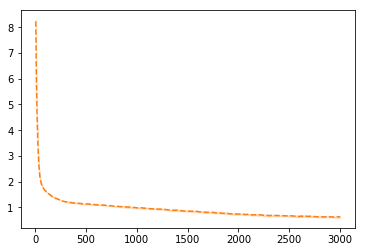

In [24]:
    
from sklearn.model_selection import GroupKFold
from autoencode import my_cross_validate
data1 = pd.read_csv("X1_train.csv", index_col=0)
data2 = pd.read_csv("X2_train.csv", index_col=0)
data3 = pd.read_csv("X3_train.csv", index_col=0)

data = pd.concat([data1, data2, data3], axis=1)

input_shape = (data.shape[1],)
latent_shape = (100,)

config = {
    "encoder": [
        {
            "name": "hidden1_encoder",
            "type": "Dense",
            "kwargs": {
                "units": 200,
                "activation": "relu"
            },
            "regularizer": {
                "type": "l1",
                "value": 1e-3
            }
        },
        {
            "name": "latent",
            "type": "Dense",
            "kwargs": {
                "units": latent_shape[0],
                "activation": "relu"
            }
        }
    ],
    "decoder": [
        {
            "name": "hidden1_decoder",
            "type": "Dense",
            "kwargs": {
                "units": 200,
                "activation": "relu"
            }
        },
        {
            "name": "output",
            "type": "Dense",
            "kwargs": {
                "units": data.shape[1],
                "activation": "linear"
            }
        }
    ]
}

ae = Autoencoder(config["encoder"],
                 config["decoder"],
                 input_shape=input_shape,
                 latent_shape=latent_shape,
                 loss="mean_squared_error",
                 optimizer_params=None)

group_kfold = GroupKFold(n_splits=5)
groups = pd.read_csv("ID_train.csv", index_col=0,
                      names=["Sample ID", "Person ID"])

scaler = StandardScaler()
clf = Pipeline(steps=[('standardscaler', scaler), ('autoencoder', ae)])

experiment = Experiment(project_name="comet test", api_key="50kNmWUHJrWHz3FlgtpITIsB1")

"""
scores = cross_validate(clf, data, data, groups=groups,
                        scoring="neg_mean_squared_error",
                        cv=group_kfold, return_train_score=True)

"""
scores = my_cross_validate(ae, data, groups, experiment=experiment)

print([score/data.shape[1] for score in scores])



In [31]:
data_train, data_test = train_test_split(data)


In [32]:
sc = StandardScaler()
data_train = sc.fit_transform(data_train)
data_test = sc.transform(data_test)

ae.fit(data_train)

Epoch 1/500
150/150 [==============================] - 0s 865us/step - loss: 1.3130
Epoch 2/500
150/150 [==============================] - 0s 562us/step - loss: 1.1780
Epoch 3/500
150/150 [==============================] - 0s 509us/step - loss: 1.0493
Epoch 4/500
150/150 [==============================] - 0s 466us/step - loss: 0.9640
Epoch 5/500
150/150 [==============================] - 0s 471us/step - loss: 0.8747
Epoch 6/500
150/150 [==============================] - 0s 443us/step - loss: 0.8054
Epoch 7/500
150/150 [==============================] - 0s 441us/step - loss: 0.7602
Epoch 8/500
150/150 [==============================] - 0s 460us/step - loss: 0.7400
Epoch 9/500
150/150 [==============================] - 0s 450us/step - loss: 0.7279
Epoch 10/500
150/150 [==============================] - 0s 430us/step - loss: 0.7048
Epoch 11/500
150/150 [==============================] - 0s 464us/step - loss: 0.6818
Epoch 12/500
150/150 [==============================] - 0s 489us/step - lo

150/150 [==============================] - 0s 509us/step - loss: 0.6302
Epoch 193/500
150/150 [==============================] - 0s 465us/step - loss: 0.6131
Epoch 194/500
150/150 [==============================] - 0s 438us/step - loss: 0.6321
Epoch 195/500
150/150 [==============================] - 0s 426us/step - loss: 0.5959
Epoch 196/500
150/150 [==============================] - 0s 442us/step - loss: 0.6134
Epoch 197/500
150/150 [==============================] - 0s 428us/step - loss: 0.6040
Epoch 198/500
150/150 [==============================] - 0s 447us/step - loss: 0.6066
Epoch 199/500
150/150 [==============================] - 0s 431us/step - loss: 0.5967
Epoch 200/500
150/150 [==============================] - 0s 437us/step - loss: 0.6704
Epoch 201/500
150/150 [==============================] - 0s 422us/step - loss: 0.5873
Epoch 202/500
150/150 [==============================] - 0s 446us/step - loss: 0.5868
Epoch 203/500
150/150 [==============================] - 0s 429us/st

150/150 [==============================] - 0s 469us/step - loss: 0.5851
Epoch 288/500
150/150 [==============================] - 0s 458us/step - loss: 0.5893
Epoch 289/500
150/150 [==============================] - 0s 479us/step - loss: 0.5908
Epoch 290/500
150/150 [==============================] - 0s 509us/step - loss: 0.5836
Epoch 291/500
150/150 [==============================] - 0s 432us/step - loss: 0.5770
Epoch 292/500
150/150 [==============================] - 0s 463us/step - loss: 0.6459
Epoch 293/500
150/150 [==============================] - 0s 505us/step - loss: 0.5796
Epoch 294/500
150/150 [==============================] - 0s 461us/step - loss: 0.5830
Epoch 295/500
150/150 [==============================] - 0s 481us/step - loss: 0.5918
Epoch 296/500
150/150 [==============================] - 0s 459us/step - loss: 0.5774
Epoch 297/500
150/150 [==============================] - 0s 470us/step - loss: 0.5786
Epoch 298/500
150/150 [==============================] - 0s 482us/st

150/150 [==============================] - 0s 444us/step - loss: 0.6207
Epoch 478/500
150/150 [==============================] - 0s 441us/step - loss: 0.6147
Epoch 479/500
150/150 [==============================] - 0s 447us/step - loss: 0.6236
Epoch 480/500
150/150 [==============================] - 0s 468us/step - loss: 0.6158
Epoch 481/500
150/150 [==============================] - 0s 461us/step - loss: 0.6074
Epoch 482/500
150/150 [==============================] - 0s 423us/step - loss: 0.6104
Epoch 483/500
150/150 [==============================] - 0s 445us/step - loss: 0.6309
Epoch 484/500
150/150 [==============================] - 0s 430us/step - loss: 0.6394
Epoch 485/500
150/150 [==============================] - 0s 453us/step - loss: 0.6658
Epoch 486/500
150/150 [==============================] - 0s 439us/step - loss: 0.6675
Epoch 487/500
150/150 [==============================] - 0s 437us/step - loss: 0.6498
Epoch 488/500
150/150 [==============================] - 0s 437us/st

In [43]:
data_pred = ae.predict(data_train)

In [44]:
rmse = np.sqrt((data_pred - data_train)**2).mean()

In [45]:
rmse

0.4356370228971891

COMET ERROR: Streaming error
